This notebook plots (for the cropped region with western mountains):
1. the cumulative TPC values vs. the amplitude dispersion values for each pixel
2. the cumulative TPC values vs. the average amplitude value for each pixel 

Notebook written 6-14-23.

***

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from datetime import datetime
import imageio
from scipy.ndimage import gaussian_filter, uniform_filter
%matplotlib  widget

Load the cumulative TPC, amp dispersion, and avg amp files. 

In [2]:
workdir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'

# larger cropped area with western mountains 
dx = 4000
dy = 1100

f1 = gdal.Open(workdir+'TPC_sums.r4', gdal.GA_ReadOnly)
TPC_sum = f1.ReadAsArray()
f1 = gdal.Open(workdir+'avg_amp.r4', gdal.GA_ReadOnly)
avg_amp = f1.ReadAsArray()
f1 = gdal.Open(workdir+'amp_dispersion.r4', gdal.GA_ReadOnly)
amp_dispersion = f1.ReadAsArray()

print('Cumulative TPC, amplitude dispersion, and avg amplitude files read in.')

Cumulative TPC, amplitude dispersion, and avg amplitude files read in.


Plot them. 

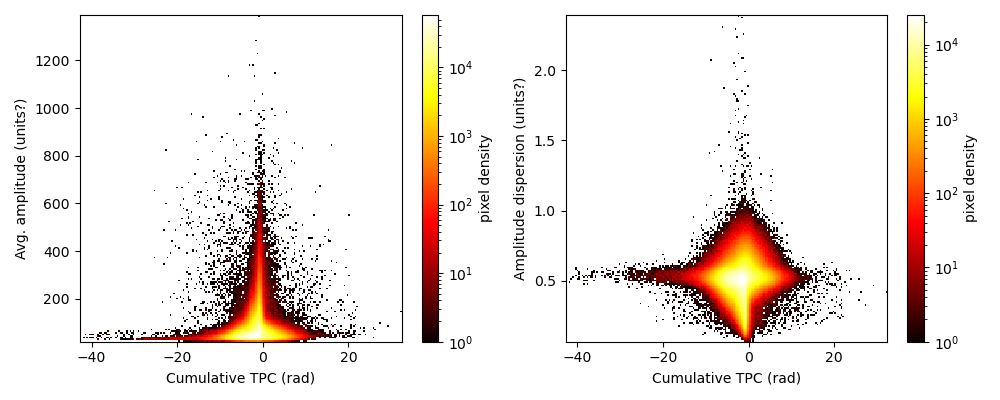

In [3]:
import matplotlib.colors as mcolors
numBins = 200

plt.figure(figsize=(10,4),tight_layout=True)
plt.subplot(1,2,1)
plt.hist2d(TPC_sum.flatten(),avg_amp.flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Avg. amplitude (units?)')
plt.subplot(1,2,2)
plt.hist2d(TPC_sum.flatten(),amp_dispersion.flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Amplitude dispersion (units?)')
plt.show()

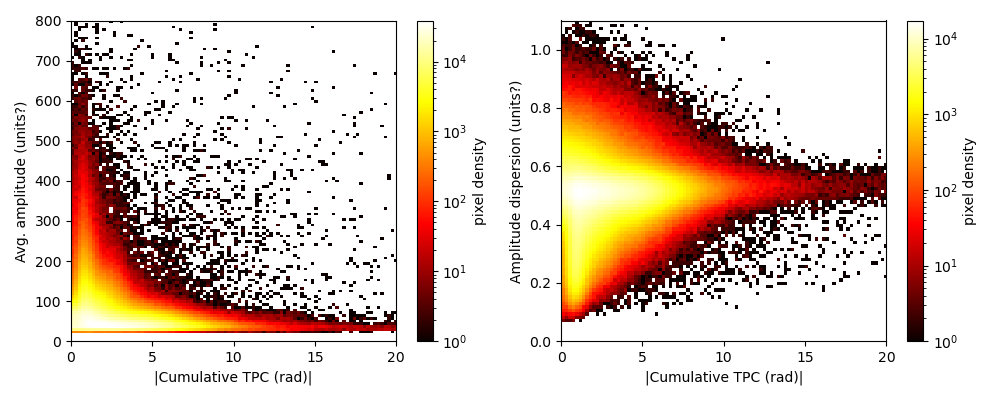

In [4]:
plt.figure(figsize=(10,4),tight_layout=True)
plt.subplot(1,2,1)
plt.hist2d(abs(TPC_sum.flatten()),avg_amp.flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('|Cumulative TPC (rad)|')
plt.ylabel('Avg. amplitude (units?)')
plt.xlim([0,20]); plt.ylim([0,800])
plt.subplot(1,2,2)
plt.hist2d(abs(TPC_sum.flatten()),amp_dispersion.flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('|Cumulative TPC (rad)|')
plt.ylabel('Amplitude dispersion (units?)')
plt.xlim([0,20]); plt.ylim([0,1.1])
plt.show()

Separate out each surface type now and plot the above plots for each surface type.

In [5]:
# load LS and mtns masks. 
maskdir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/masks/'
file = 'LS_mask.r4'
ds = gdal.Open(maskdir+file,gdal.GA_ReadOnly)
LS_mask = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
LS_y,LS_x = np.nonzero(LS_mask)
print('LS mask loaded.')
file = 'mtns_mask.r4'
ds = gdal.Open(maskdir+file,gdal.GA_ReadOnly)
mtns_mask = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
mtns_y,mtns_x = np.nonzero(mtns_mask)
print('mtns mask loaded.')
# Find pixels that are neither in LS or mountains (open desert).
desert_mask = np.ones(np.shape(mtns_mask))
desert_mask[LS_y,LS_x] = 0.0
desert_mask[mtns_y,mtns_x] = 0.0
desert_y,desert_x = np.nonzero(desert_mask)

LS mask loaded.
mtns mask loaded.


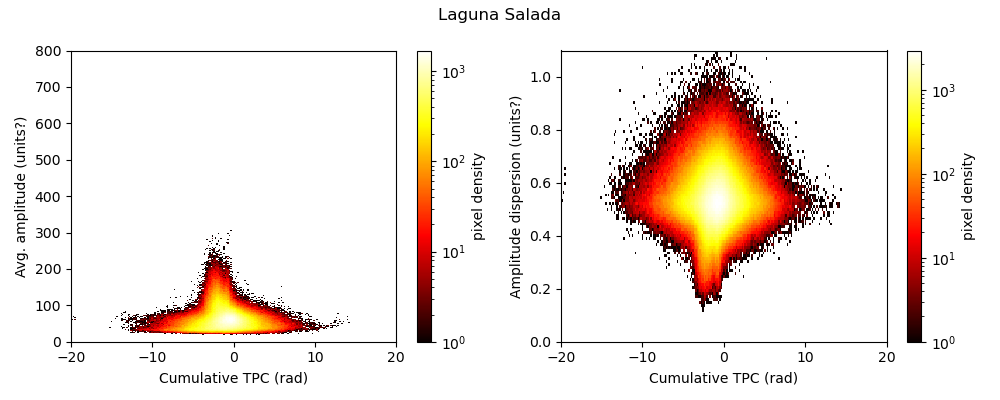

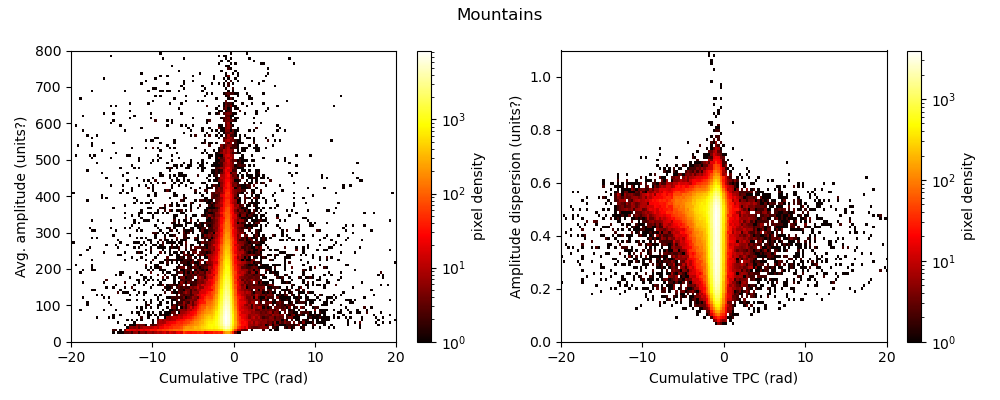

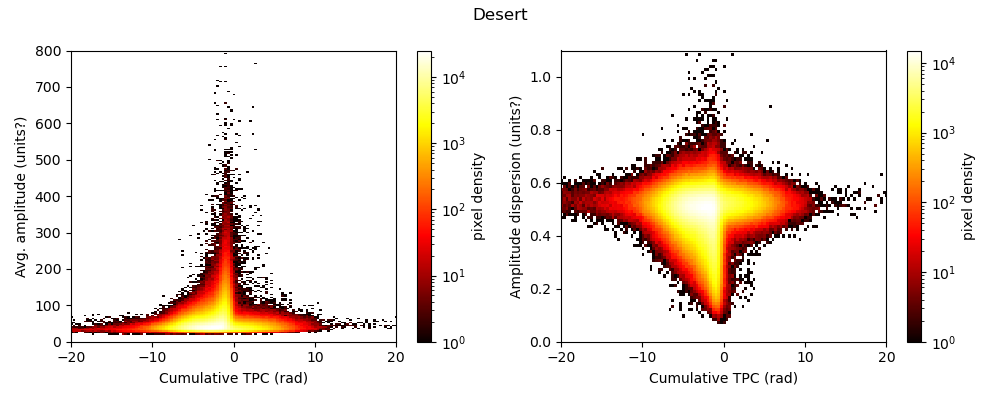

In [10]:
xlims = [-20,20]
ylims = [0,800]
ylims2 = [0,1.1]

plt.figure(figsize=(10,4),tight_layout=True)
plt.subplot(1,2,1)
plt.hist2d(TPC_sum[LS_y,LS_x].flatten(),avg_amp[LS_y,LS_x].flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Avg. amplitude (units?)')
plt.xlim(xlims); plt.ylim(ylims)
plt.subplot(1,2,2)
plt.hist2d(TPC_sum[LS_y,LS_x].flatten(),amp_dispersion[LS_y,LS_x].flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Amplitude dispersion (units?)')
plt.xlim(xlims); plt.ylim(ylims2)
plt.suptitle('Laguna Salada')
plt.show()
plt.figure(figsize=(10,4),tight_layout=True)
plt.subplot(1,2,1)
plt.hist2d(TPC_sum[mtns_y,mtns_x].flatten(),avg_amp[mtns_y,mtns_x].flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Avg. amplitude (units?)')
plt.xlim(xlims); plt.ylim(ylims)
plt.subplot(1,2,2)
plt.hist2d(TPC_sum[mtns_y,mtns_x].flatten(),amp_dispersion[mtns_y,mtns_x].flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Amplitude dispersion (units?)')
plt.xlim(xlims); plt.ylim(ylims2)
plt.suptitle('Mountains')
plt.show()
plt.figure(figsize=(10,4),tight_layout=True)
plt.subplot(1,2,1)
plt.hist2d(TPC_sum[desert_y,desert_x].flatten(),avg_amp[desert_y,desert_x].flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Avg. amplitude (units?)')
plt.xlim(xlims); plt.ylim(ylims)
plt.subplot(1,2,2)
plt.hist2d(TPC_sum[desert_y,desert_x].flatten(),amp_dispersion[desert_y,desert_x].flatten(),bins=numBins,norm=mcolors.LogNorm())
plt.colorbar(label='pixel density'); plt.set_cmap('hot') # plasma is original 
plt.xlabel('Cumulative TPC (rad)')
plt.ylabel('Amplitude dispersion (units?)')
plt.xlim(xlims); plt.ylim(ylims2)
plt.suptitle('Desert')
plt.show()